In [13]:
# ============================================================
# 🔹 model_evaluation.ipynb — Evaluación de modelos entrenados
# ============================================================

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# ============================================================
# 1️⃣ Cargar datos y modelos entrenados
# ============================================================

# Datos
X_test = np.load('../data/X_test.npy', allow_pickle=True)
y_test = np.load('../data/y_test.npy', allow_pickle=True)
X_train = np.load('../data/X_train.npy', allow_pickle=True)
y_train = np.load('../data/y_train.npy', allow_pickle=True)

# Modelos
logreg = joblib.load('../data/best_model_logreg.pkl')
rf = joblib.load('../data/best_model_rf.pkl')
xgb = joblib.load('../data/best_model_xgb.pkl')

models = {
    "LogisticRegression": logreg,
    "RandomForest": rf,
    "XGBoost": xgb
}

print("✅ Modelos cargados correctamente.")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")


✅ Modelos cargados correctamente.
Conjunto de entrenamiento: (1600, 4), (1600,)
Conjunto de prueba: (400, 4), (400,)



🚀 Evaluando modelo: LogisticRegression
Accuracy train: 0.898 | test: 0.938
F1 train: 0.884 | test: 0.928
Validación cruzada (CV=5): 0.896 ± 0.021


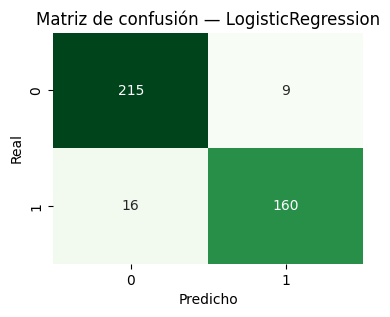


🚀 Evaluando modelo: RandomForest
Accuracy train: 0.949 | test: 0.963
F1 train: 0.944 | test: 0.958
Validación cruzada (CV=5): 0.941 ± 0.012


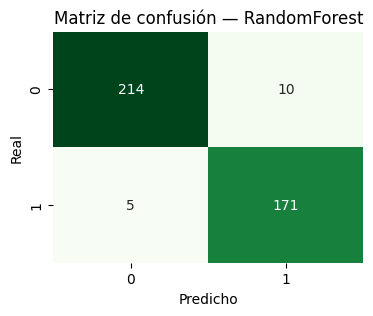


🚀 Evaluando modelo: XGBoost
Accuracy train: 0.994 | test: 0.980
F1 train: 0.993 | test: 0.977
Validación cruzada (CV=5): 0.973 ± 0.007


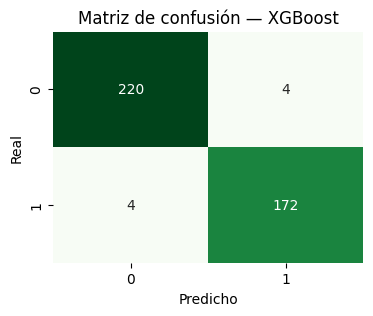

,Modelo,Accuracy (Train),Accuracy (Test),F1 (Train),F1 (Test),CV Mean,CV Std
0,LogisticRegression,0.898,0.938,0.884,0.928,0.896,0.021
1,RandomForest,0.949,0.963,0.944,0.958,0.941,0.012
2,XGBoost,0.994,0.980,0.993,0.977,0.973,0.007


In [14]:
# ============================================================
# 2️⃣ Evaluar cada modelo en train/test + validación cruzada
# ============================================================

results = []

for name, model in models.items():
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Métricas
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    # Validación cruzada (robustez)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results.append({
        "Modelo": name,
        "Accuracy (Train)": round(acc_train, 3),
        "Accuracy (Test)": round(acc_test, 3),
        "F1 (Train)": round(f1_train, 3),
        "F1 (Test)": round(f1_test, 3),
        "CV Mean": round(scores.mean(), 3),
        "CV Std": round(scores.std(), 3)
    })

    # Reporte individual
    print(f"\n🚀 Evaluando modelo: {name}")
    print(f"Accuracy train: {acc_train:.3f} | test: {acc_test:.3f}")
    print(f"F1 train: {f1_train:.3f} | test: {f1_test:.3f}")
    print(f"Validación cruzada (CV=5): {scores.mean():.3f} ± {scores.std():.3f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f"Matriz de confusión — {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Convertir a DataFrame
df_results = pd.DataFrame(results)
df_results


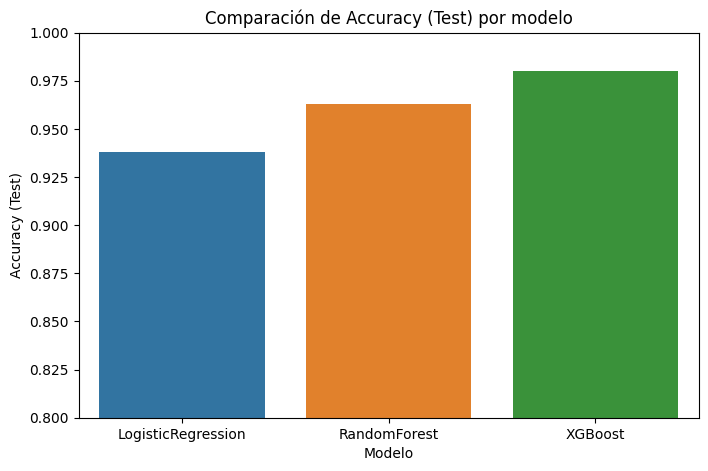

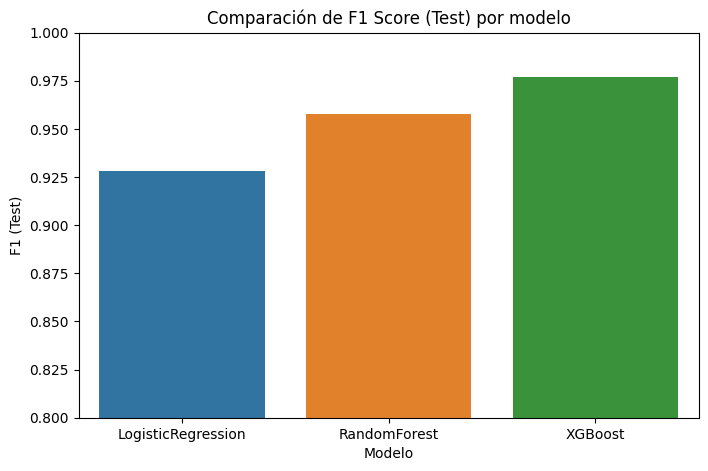

In [15]:
# ============================================================
# 3️⃣ Comparación visual entre modelos
# ============================================================

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="Accuracy (Test)", data=df_results, hue="Modelo", dodge=False)
plt.title("Comparación de Accuracy (Test) por modelo")
plt.ylim(0.8, 1.0)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="F1 (Test)", data=df_results, hue="Modelo", dodge=False)
plt.title("Comparación de F1 Score (Test) por modelo")
plt.ylim(0.8, 1.0)
plt.show()


In [16]:
# ============================================================
# 4️⃣ Resumen final y exportación
# ============================================================

best_model = df_results.loc[df_results["F1 (Test)"].idxmax()]

print("\n🏆 Mejor modelo encontrado:")
print(best_model)

print("\nResumen general de desempeño:")
print(df_results.to_markdown(index=False))

# Exportar resultados a CSV
df_results.to_csv('../data/model_results_summary.csv', index=False)
print("\n✅ Resultados exportados a '../data/model_results_summary.csv'")



🏆 Mejor modelo encontrado:
Modelo              XGBoost
Accuracy (Train)      0.994
Accuracy (Test)        0.98
F1 (Train)            0.993
F1 (Test)             0.977
CV Mean               0.973
CV Std                0.007
Name: 2, dtype: object

Resumen general de desempeño:
| Modelo             |   Accuracy (Train) |   Accuracy (Test) |   F1 (Train) |   F1 (Test) |   CV Mean |   CV Std |
|:-------------------|-------------------:|------------------:|-------------:|------------:|----------:|---------:|
| LogisticRegression |              0.898 |             0.938 |        0.884 |       0.928 |     0.896 |    0.021 |
| RandomForest       |              0.949 |             0.963 |        0.944 |       0.958 |     0.941 |    0.012 |
| XGBoost            |              0.994 |             0.98  |        0.993 |       0.977 |     0.973 |    0.007 |

✅ Resultados exportados a '../data/model_results_summary.csv'
